In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#ML
from prophet import Prophet
sns.set(font_scale=1.5)

## Read in data

In [83]:
# Prepare the data. This script fixes the ABBREV.csv file and pulls the foods into their respective food groups
%run data_prep.py

In [84]:
averages_list = [water_average, meat_average, frozen_food_average, seafoods_average, seasonings_average, dessert_average, fruits_average, cheeses_average, milks_average, soups_average, cereals_average, babyfoods_average, beans_average, rice_average, pasta_average, fast_food_average, pizza_average, school_lunches_average, bread_average, fish_average, na_beverages_average, alcoholic_beverages_average, dressings_average, oils_average, butter_average, gravy_average, veggies_average, nuts_average, snacks_average]

# combine all the dataframes into one using concat
all_averages = pd.concat(averages_list, ignore_index=True)

all_averages = all_averages.sort_values(by='Health_Score', ascending=False)
all_averages['Name'] = all_averages['Name'].str.replace('_Average', '')
all_averages['Name'] = all_averages['Name'].str.replace('_average', '')
all_averages

,id,Name,Calories,Protein_(mg),Carbs_(mg),Fiber_(mg),Sugar_(mg),Calcium_(mg),Sodium_(mg),Total_Fat_(mg),Potassium_(mg),Water_(mg),Vitamins_(mg),Unhealthy_Nutrients,Healthy_Nutrients,Health_Score
0,99999,water,0.33,0.00,43.33,0.00,0.00,5.00,5.67,0.00,1.33,99943.33,0.00,0.00,99956.67,99956.67
1,99999,meat,188.37,22335.25,1480.18,74.65,615.30,17.99,177.41,7231.17,294.02,65334.67,1400.47,13562.56,95085.19,94799.29
19,99999,fish,173.93,18668.08,3459.69,335.14,485.31,43.57,330.19,5847.88,345.68,67072.80,1071.87,12171.67,93343.83,92751.47
3,99999,sea_foods,115.00,14444.21,6506.58,940.58,673.11,54.70,486.53,1573.08,282.22,73362.89,356.90,4562.66,92208.62,92127.09
26,99999,veggies,70.75,2258.19,10116.72,2330.41,5298.86,59.56,138.52,474.95,286.50,83051.33,2819.15,5130.66,91174.16,90403.27
9,99999,soups,70.21,2967.30,9654.33,1449.47,2187.68,20.35,454.57,1696.96,206.98,83349.20,731.79,4874.86,90227.73,90150.64
12,99999,beans,139.41,9366.28,22463.09,7245.93,2188.75,62.24,139.57,900.38,477.95,64597.87,165.91,3727.14,82917.19,82893.50
6,99999,fruits,85.80,1535.27,19218.96,2201.82,13534.41,34.25,33.19,581.96,233.80,77428.46,616.92,11986.09,82575.84,82344.08
20,99999,na_beverages,92.27,2769.25,15503.54,618.89,11182.85,57.69,98.32,750.12,233.84,78000.04,508.22,10926.23,82667.16,82128.09
8,99999,milks,127.62,8921.91,14776.17,70.21,15879.44,300.55,175.49,3290.34,406.04,70616.81,421.14,18087.19,82409.55,82080.77


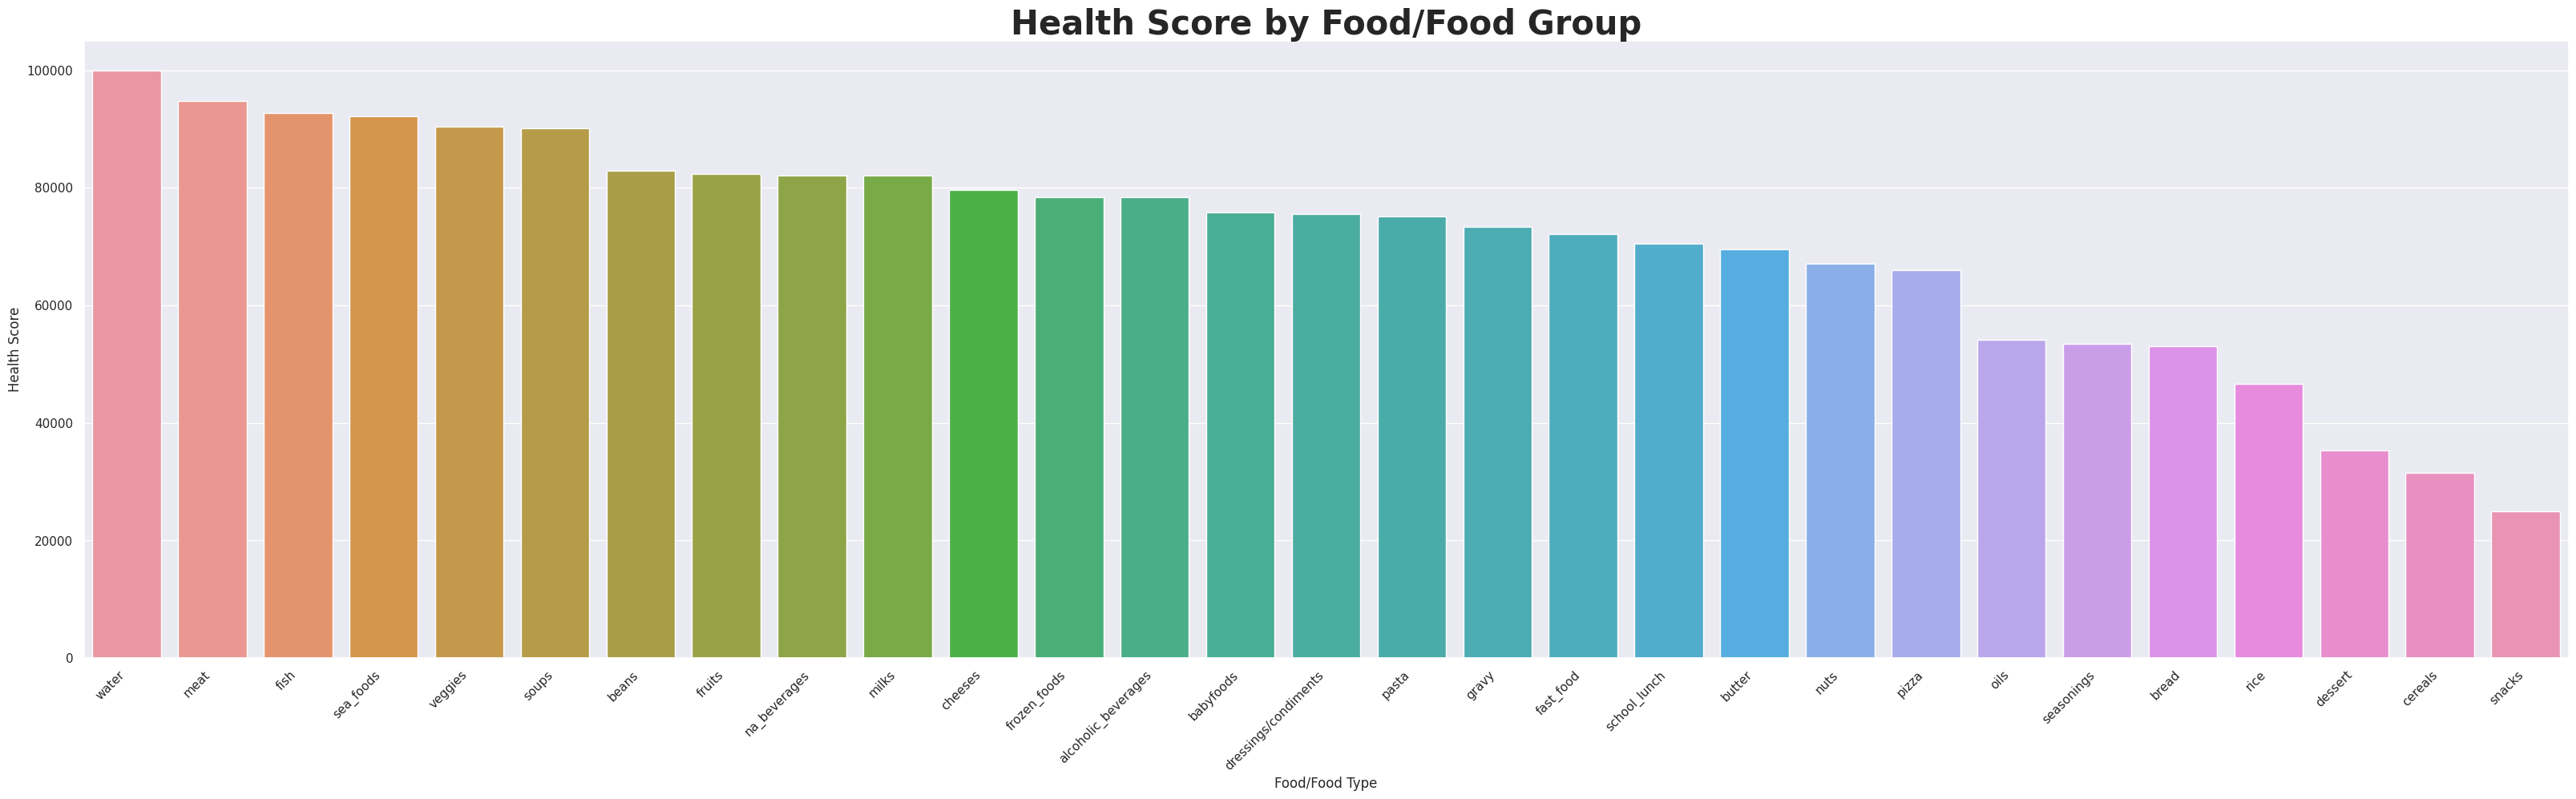

In [85]:
#Create bar graph of top ten Countries by coffee consumption
sns.set(rc={"figure.figsize":(40, 10)})
nutrition_barplot = sns.barplot(x=all_averages['Name'], y = all_averages['Health_Score'])
nutrition_barplot.set_ylabel('Health Score')
nutrition_barplot.set_xlabel('Food/Food Type')
nutrition_barplot.set_title('Health Score by Food/Food Group', fontdict={'size': 30, 'weight': 'bold'})
nutrition_barplot.set_xticklabels(nutrition_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.ylim(0,50000)
plt.show()

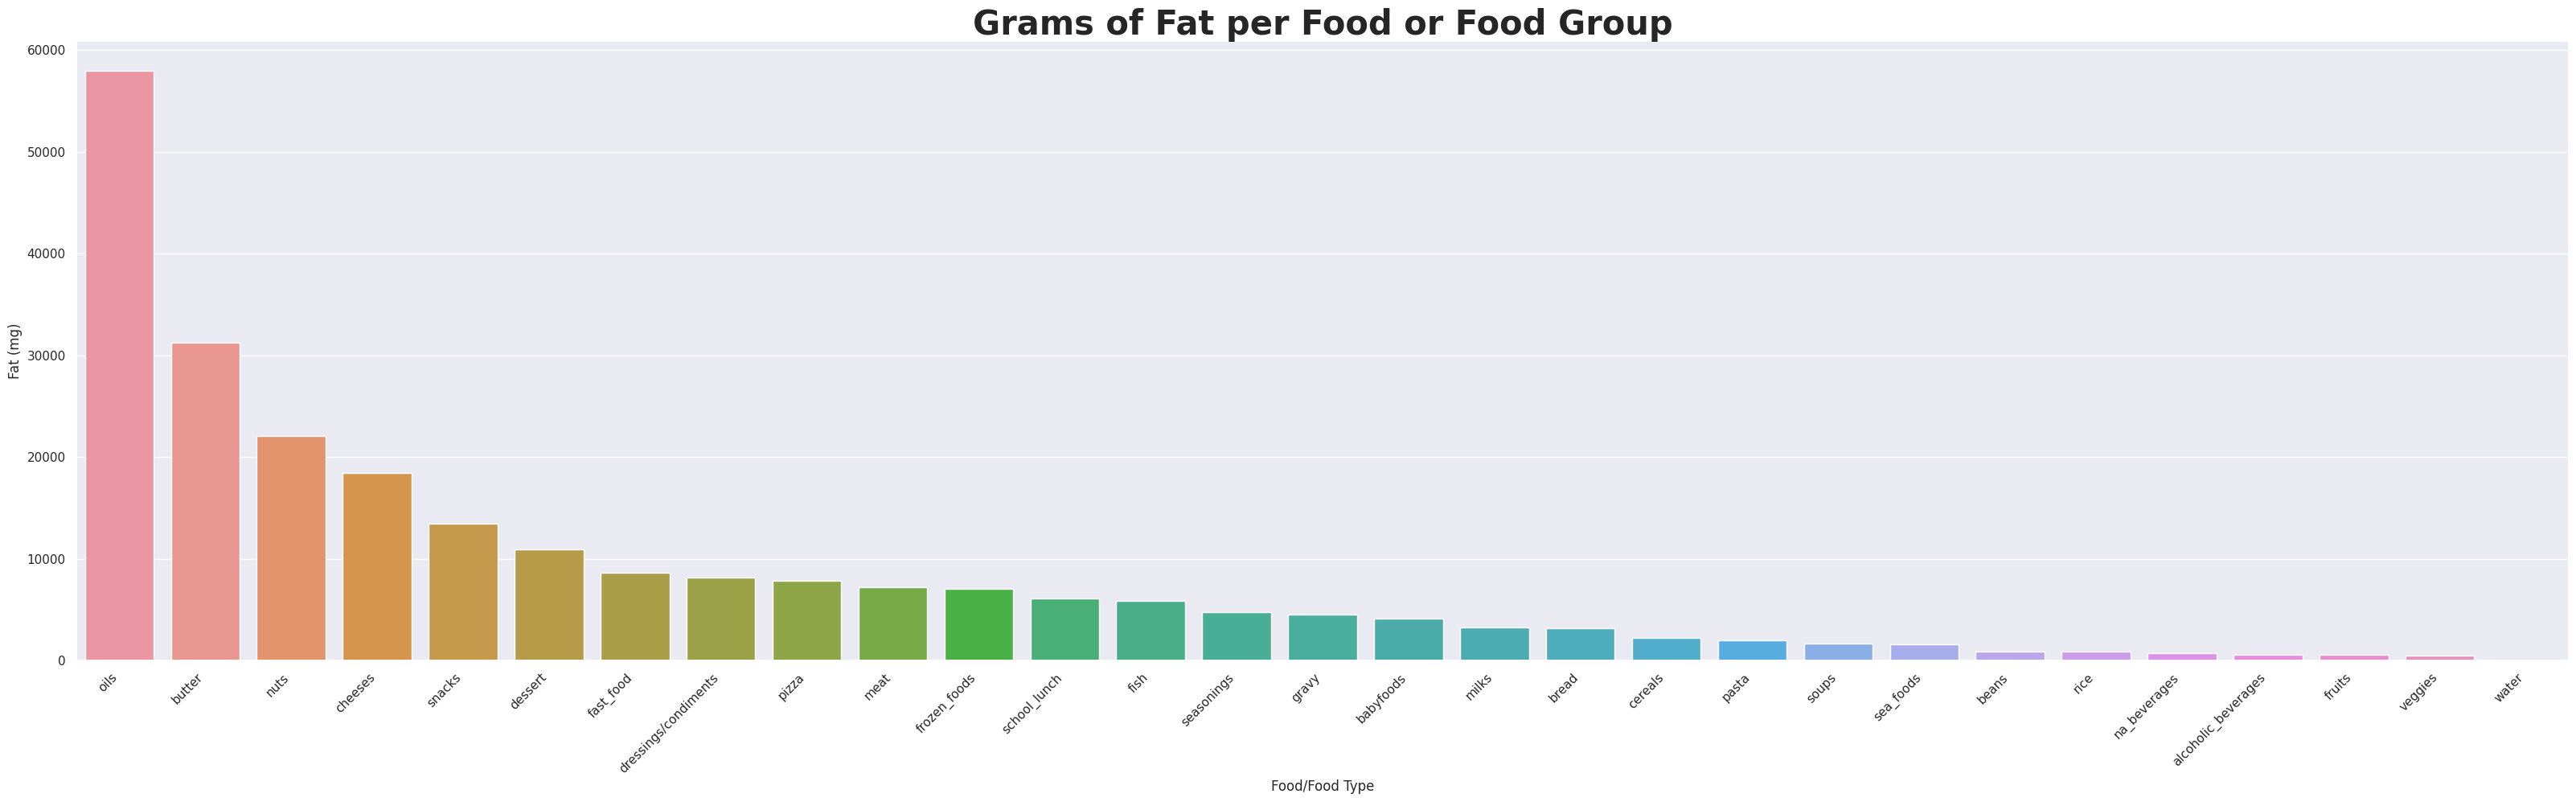

In [66]:
all_averages = all_averages.sort_values(by='Total_Fat_(mg)', ascending=False)

sns.set(rc={"figure.figsize":(40, 10)})
nutrition_barplot = sns.barplot(x=all_averages['Name'], y = all_averages['Total_Fat_(mg)'])
nutrition_barplot.set_ylabel('Fat (mg)')
nutrition_barplot.set_xlabel('Food/Food Type')
nutrition_barplot.set_title('Grams of Fat per Food or Food Group', fontdict={'size': 30, 'weight': 'bold'})
nutrition_barplot.set_xticklabels(nutrition_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.ylim(0,60)
plt.show()

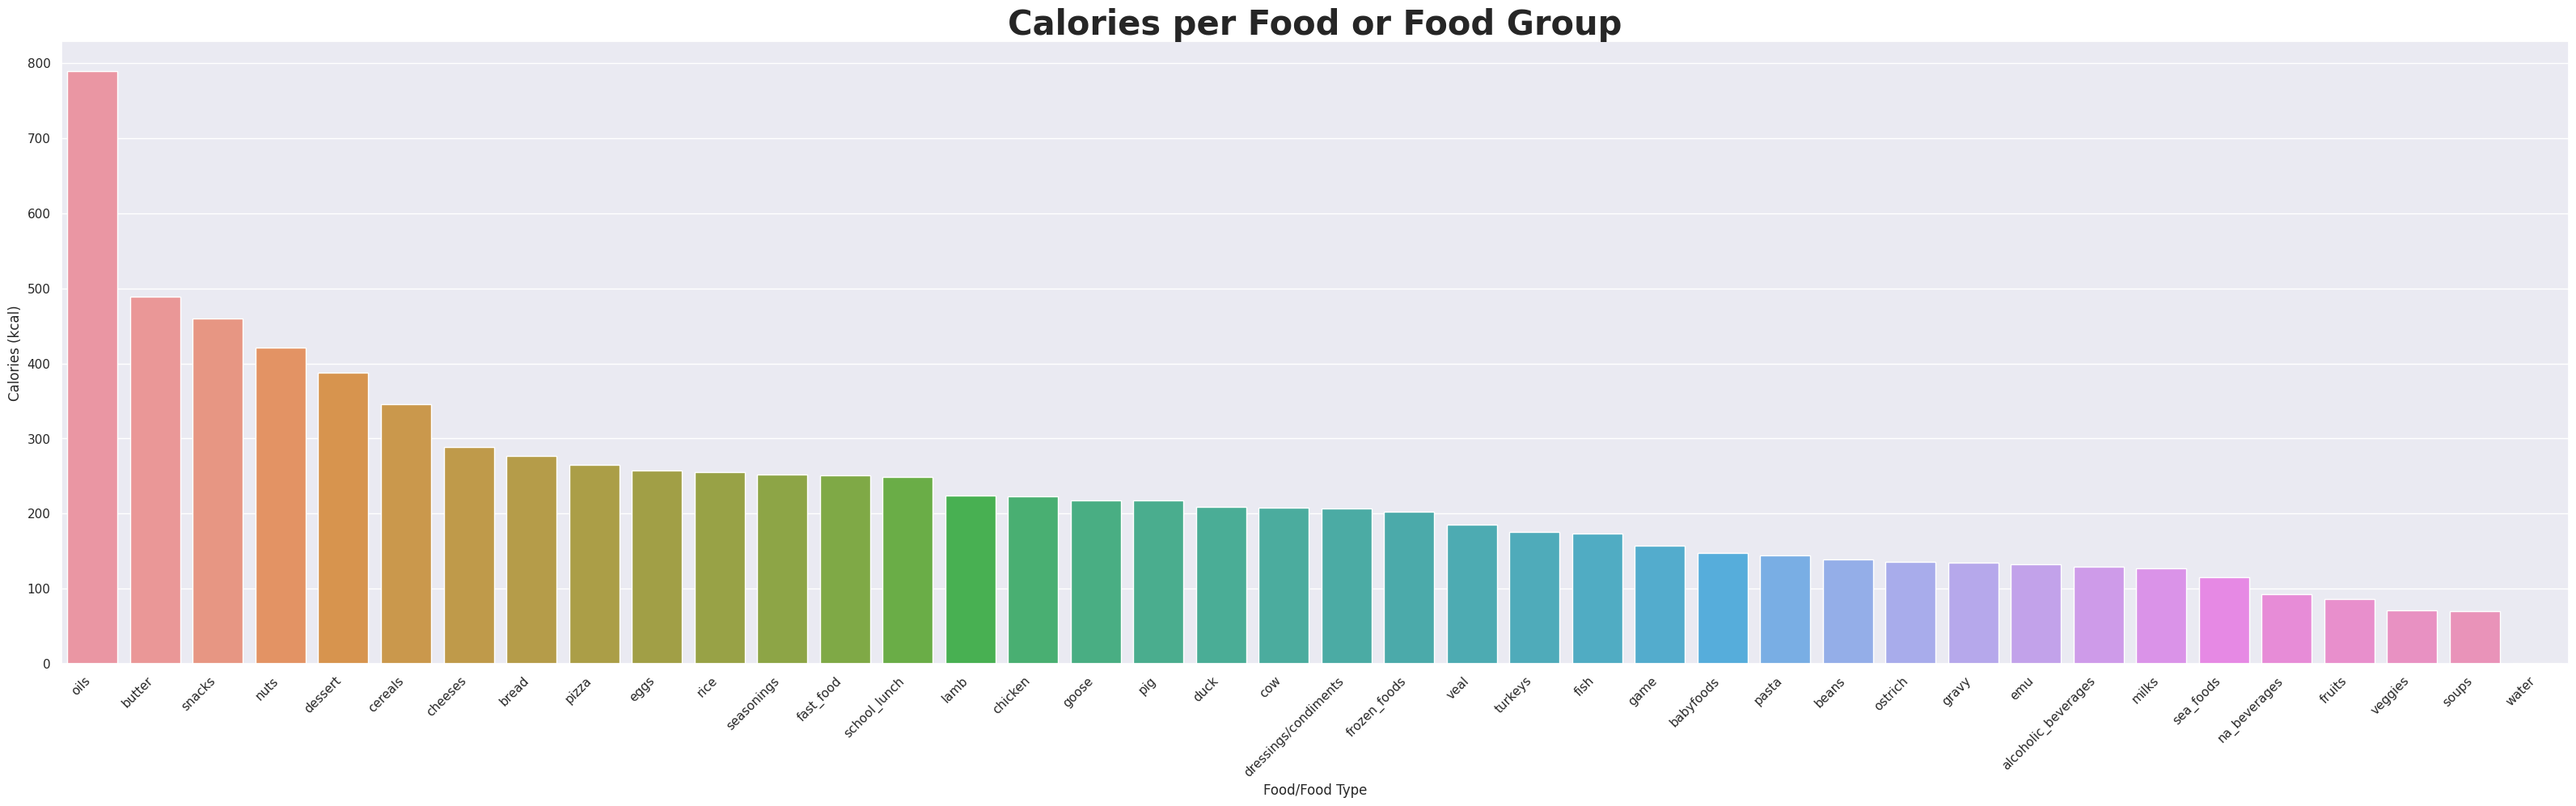

In [6]:
all_averages = all_averages.sort_values(by='Calories', ascending=False)

sns.set(rc={"figure.figsize":(40, 10)})
nutrition_barplot = sns.barplot(x=all_averages['Name'], y = all_averages['Calories'])
nutrition_barplot.set_ylabel('Calories (kcal)')
nutrition_barplot.set_xlabel('Food/Food Type')
nutrition_barplot.set_title('Calories per Food or Food Group', fontdict={'size': 30, 'weight': 'bold'})
nutrition_barplot.set_xticklabels(nutrition_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.ylim(0,60)
plt.show()

In [87]:
df = df.sort_values(by='Health_Score', ascending=False)
top_health_score = df.loc[:, ['Name', 'Calories', 'Healthy_Nutrients', 'Unhealthy_Nutrients', 'Health_Score']]
top_health_score.head(10)

,Name,Calories,Healthy_Nutrients,Unhealthy_Nutrients,Health_Score
1095,"BEEF,NZ,IMP,VAR MEATS & BY-PRODUCTS,LIVER,RAW",133,216081.4,5489.0,216032.824779
1090,"BEEF,NZ,IMP,VAR MEATS & BY-PRODUCTS LIVER,CKD,BLD",150,183358.4,6315.0,183284.105882
8530,"VEAL,VAR MEATS&BY-PRODUCTS,LIVER,CKD,BRSD",192,183169.6,8757.0,183060.137500
4007,"FISH OIL,COD LIVER",902,209282.2,123178.0,181909.311111
5161,"LAMB,NZ,IMP,LIVER,CKD,SOAKED & FRIED",168,179570.3,9085.0,179463.417647
8531,"VEAL,VAR MEATS&BY-PRODUCTS,LIVER,CKD,PAN-FRIED",193,177681.5,9104.0,177545.619403
5162,"LAMB,NZ,IMP,LIVER,RAW",136,160920.4,6820.0,160860.046018
3760,"DUCK,DOMESTICATED,LIVER,RAW",136,144492.5,6595.0,144342.613636
8532,"VEAL,VAR MEATS&BY-PRODUCTS,LIVER,RAW",140,144227.0,6744.0,143989.535211
8306,"TURKEY,LIVER,ALL CLASSES,CKD,SIMMRD",189,141448.4,11132.0,141238.362264


In [88]:
top_health_score.tail(10)

,Name,Calories,Healthy_Nutrients,Unhealthy_Nutrients,Health_Score
7955,"SUGAR,TURBINADO",399,77.4,99190.0,-21485.643478
7957,"SUGARS,BROWN",380,1717.9,97020.0,-30622.100000
7958,"SUGARS,GRANULATED",387,24.0,99800.0,-35618.857143
6225,"PEPPERS,SWT,GRN,FREEZE-DRIED",314,54879.4,41927.0,-49938.100000
1688,"BEVERAGES,COFFEE,INST,W/ WHTNR,RED CAL",509,11980.6,113228.0,-54624.105882
8043,"SWEETENERS,TABLETOP,SUCRALOSE,SPLENDA PACKETS",336,8834.0,80330.0,-71496.000000
8042,"SWEETENERS,TABLETOP,SACCHARIN (SODIUM SACCHARIN)",360,10122.0,85190.0,-75068.000000
4413,"HAZELNUTS,BEAKED (NORTHERN PLAINS INDIANS)",628,32455.5,52990.0,-100019.500000
5858,"OIL,PAM COOKING SPRAY,ORIGINAL",792,72366.0,83715.0,-206684.000000
8041,"SWEETENERS,TABLETOP,FRUCTOSE,LIQ",279,24003.2,76000.0,-735996.800000


In [10]:
#Create heatmap to check correlation in data
correlation = df[["Calories", 'Carbs_(mg)', 'Protein_(mg)', "Sugar_(mg)", "Calcium_(mg)", "Total_Fat_(mg)", "Sodium_(mg)", "Potassium_(mg)", "Water_(mg)", 'Vitamins_(mg)', 'Health_Score']].copy()
sns.set_theme(style="white")
corr = correlation.corr(method = 'pearson',  # The method of correlation
                  min_periods = 1 )
corr.style.background_gradient(cmap='coolwarm')

,Calories,Carbs_(mg),Protein_(mg),Sugar_(mg),Calcium_(mg),Total_Fat_(mg),Sodium_(mg),Potassium_(mg),Water_(mg),Vitamins_(mg),Health_Score
Calories,1.000000,0.499241,0.110454,0.356841,0.142731,0.754074,0.052966,0.075882,-0.901279,-0.015788,-0.651156
Carbs_(mg),0.499241,1.000000,-0.309397,0.683022,0.213311,-0.093393,0.072657,0.117279,-0.777938,0.009336,-0.878675
Protein_(mg),0.110454,-0.309397,1.000000,-0.305000,0.034184,0.063114,-0.007713,0.237084,-0.096227,-0.020495,0.272803
Sugar_(mg),0.356841,0.683022,-0.305000,1.000000,0.153815,-0.007221,-0.004933,0.006171,-0.511820,0.015017,-0.671120
Calcium_(mg),0.142731,0.213311,0.034184,0.153815,1.000000,0.014646,0.179147,0.251985,-0.262948,0.057596,-0.209294
Total_Fat_(mg),0.754074,-0.093393,0.063114,-0.007221,0.014646,1.000000,0.001233,-0.051312,-0.432618,-0.016100,-0.186822
Sodium_(mg),0.052966,0.072657,-0.007713,-0.004933,0.179147,0.001233,1.000000,-0.001595,-0.154458,-0.006465,-0.122810
Potassium_(mg),0.075882,0.117279,0.237084,0.006171,0.251985,-0.051312,-0.001595,1.000000,-0.197039,0.129875,-0.057529
Water_(mg),-0.901279,-0.777938,-0.096227,-0.511820,-0.262948,-0.432618,-0.154458,-0.197039,1.000000,-0.000487,0.816781
Vitamins_(mg),-0.015788,0.009336,-0.020495,0.015017,0.057596,-0.016100,-0.006465,0.129875,-0.000487,1.000000,0.131074


#### Notes: It appears that there isn't any strong correlations between any of the fields except Water's negative correlation with Calories. The highest positive correlation is between calories and fat, then sugar and carbs.

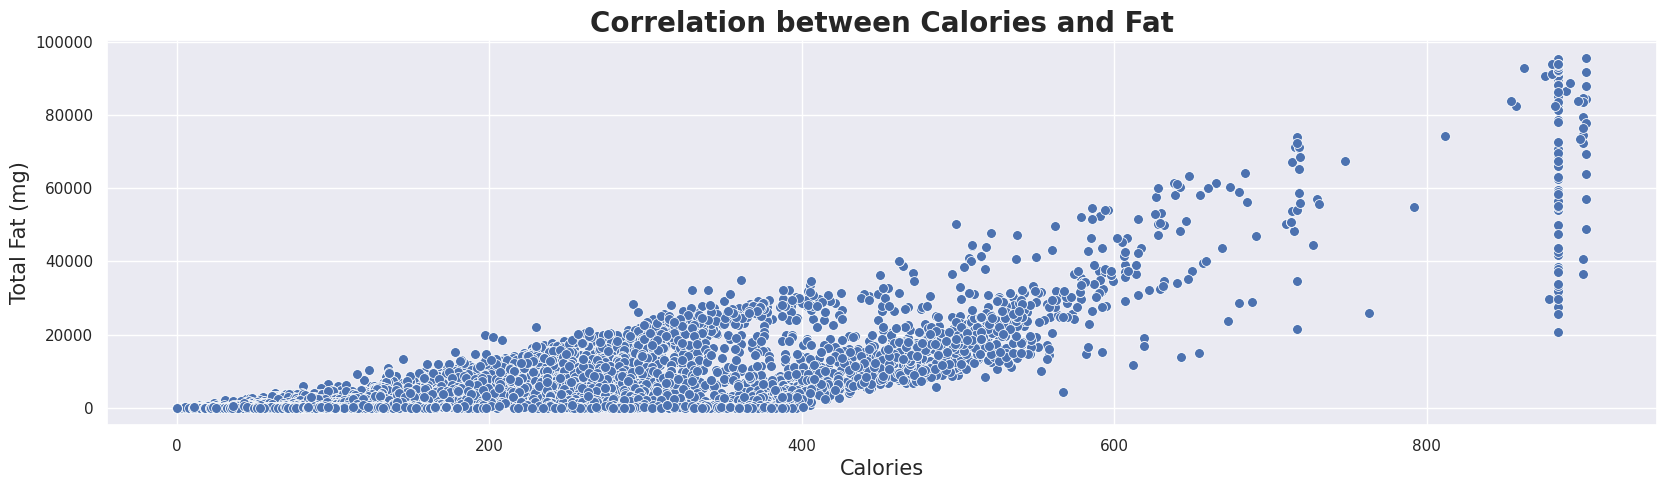

In [16]:
#Scatter plot comparing Calories with Fat
sns.set(rc={"figure.figsize":(20, 5)})
scatter = sns.scatterplot(data=df, x='Calories', y='Total_Fat_(mg)', legend='auto', s=50)
scatter.set_title("Correlation between Calories and Fat", fontdict={'size': 20, 'weight': 'bold'})
scatter.set_xlabel('Calories', fontdict={'size': 15})
scatter.set_ylabel('Total Fat (mg)', fontdict={'size': 15})
#plt.ylim(-2, 35)
#plt.xlim(0, 500)
plt.show()

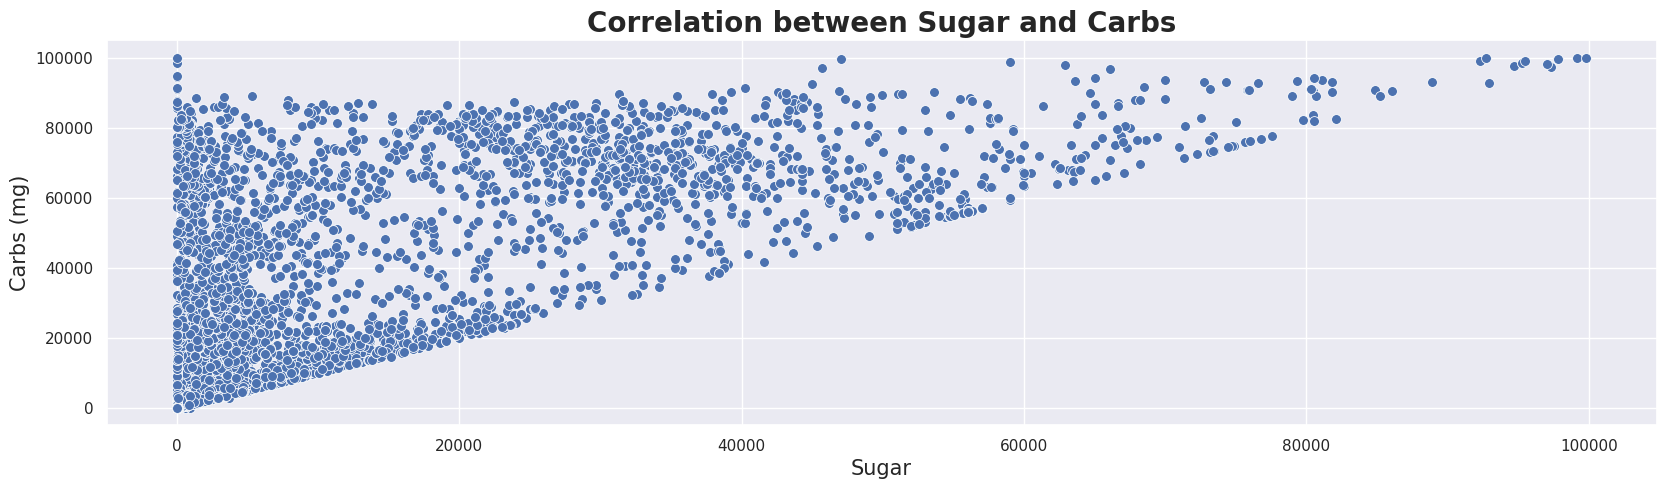

In [17]:
#Scatter plot comparing sugar and carbs
sns.set(rc={"figure.figsize":(20, 5)})
scatter = sns.scatterplot(data=df, x='Sugar_(mg)', y='Carbs_(mg)', legend='auto', s=50)
scatter.set_title("Correlation between Sugar and Carbs", fontdict={'size': 20, 'weight': 'bold'})
scatter.set_xlabel('Sugar', fontdict={'size': 15})
scatter.set_ylabel('Carbs (mg)', fontdict={'size': 15})
#plt.ylim(-2, 35)
#plt.xlim(0, 500)
plt.show()

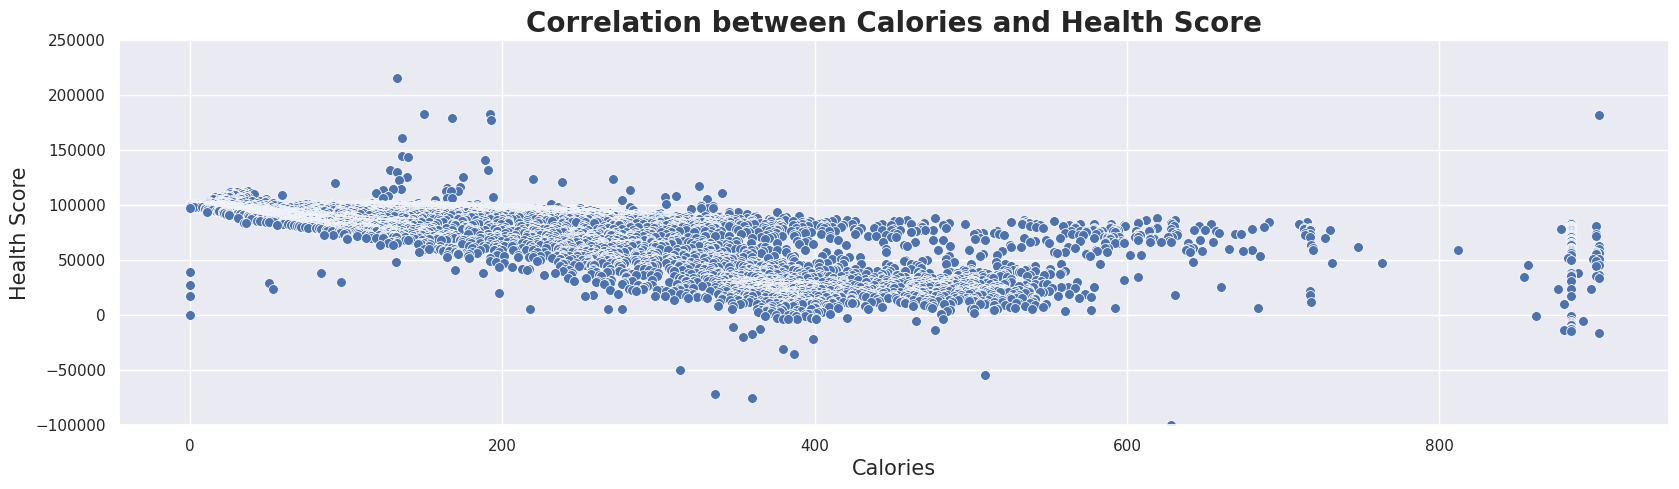

In [25]:
#Scatter plot comparing Calories with Fat
sns.set(rc={"figure.figsize":(20, 5)})
scatter = sns.scatterplot(data=df, x='Calories', y='Health_Score', legend='auto', s=50)
scatter.set_title("Correlation between Calories and Health Score", fontdict={'size': 20, 'weight': 'bold'})
scatter.set_xlabel('Calories', fontdict={'size': 15})
scatter.set_ylabel('Health Score', fontdict={'size': 15})
plt.ylim(-100000, 250000)
#plt.xlim(0, 500)
plt.show()

## Milk

In [34]:
sns.set_theme(style="white")
corr = milk.corr(method = 'pearson', min_periods = 1)
corr.style.background_gradient(cmap='coolwarm')

,Calories,Protein_(mg),Carbs_(mg),Fiber_(mg),Sugar_(mg),Calcium_(mg),Sodium_(mg),Total_Fat_(mg),Potassium_(mg),Water_(mg),Vitamins_(mg),Unhealthy_Nutrients,Healthy_Nutrients,Health_Score
Calories,1.000000,0.909869,0.928791,-0.117037,0.925994,0.872388,0.610055,0.584780,0.895767,-0.982014,0.522734,0.912362,-0.977810,-0.978268
Protein_(mg),0.909869,1.000000,0.924525,-0.159038,0.915577,0.932100,0.729219,0.250694,0.958660,-0.961234,0.536427,0.739940,-0.914367,-0.912973
Carbs_(mg),0.928791,0.924525,1.000000,-0.065231,0.995871,0.864746,0.673827,0.272786,0.889393,-0.973406,0.502178,0.821141,-0.982257,-0.981418
Fiber_(mg),-0.117037,-0.159038,-0.065231,1.000000,-0.127217,-0.147197,-0.105201,-0.073548,-0.143777,0.114412,-0.069470,-0.067586,0.089227,0.091305
Sugar_(mg),0.925994,0.915577,0.995871,-0.127217,1.000000,0.914049,0.904443,0.333132,0.913837,-0.970132,0.547412,0.916547,-0.978527,-0.978306
Calcium_(mg),0.872388,0.932100,0.864746,-0.147197,0.914049,1.000000,0.436443,0.297562,0.992354,-0.908975,0.610484,0.834261,-0.863595,-0.865827
Sodium_(mg),0.610055,0.729219,0.673827,-0.105201,0.904443,0.436443,1.000000,0.033102,0.511539,-0.674557,0.189787,0.257668,-0.644170,-0.636166
Total_Fat_(mg),0.584780,0.250694,0.272786,-0.073548,0.333132,0.297562,0.033102,1.000000,0.301531,-0.421532,0.223259,0.660587,-0.444183,-0.448012
Potassium_(mg),0.895767,0.958660,0.889393,-0.143777,0.913837,0.992354,0.511539,0.301531,1.000000,-0.934148,0.605508,0.828893,-0.887933,-0.889413
Water_(mg),-0.982014,-0.961234,-0.973406,0.114412,-0.970132,-0.908975,-0.674557,-0.421532,-0.934148,1.000000,-0.534272,-0.865699,0.988625,0.988243


#### Notes: High correlation among many fields, especially sugar, protein, carbs, and calcium. Strong negative correlation between water and most other fields.

### Are "lowfat milks" really low in fat?

In [27]:
#milk = milk.sort_values(by='Saturated_Fat_(g)', ascending=False)
fat = ['NONFAT', 'FAT FREE', 'LOWFAT', 'LOW FAT', 'LO FAT']
pattern = '|'.join(fat)

lowfat_milk = milk[milk["Name"].str.contains(pattern)]
other_milk = milk[~milk["Name"].str.contains(pattern)]

#Create row for "low fat" milk with averages for all columns
lowfat_milk.loc['9998'] = lowfat_milk.mean()
lowfat_milk.loc['9998', ['Name']] = ['Low_Fat_Milk_Average']
lowfat_milk.loc['9998', ['id']] = ['99998']
lowfat_milk = lowfat_milk.round(decimals=2)

#Create row for all other milk with averages for all columns
other_milk.loc['9999'] = other_milk.mean()
other_milk.loc['9999', ['Name']] = ['Other_Milk_Average']
other_milk.loc['9999', ['id']] = ['99999']
other_milk = other_milk.round(decimals=2)

#Combine the two and compare
compare_milk = pd.concat([lowfat_milk.loc['9998'], other_milk.loc['9999']], axis=1)
compare_milk.rename(columns={'9998': 'Low_Fat_Milk_Average', '9999': 'Other_Milk_Average'}, inplace=True)

#drop first two rows
compare_milk = compare_milk.iloc[2:]
compare_milk

,Low_Fat_Milk_Average,Other_Milk_Average
Calories,137.88,121.99
Protein_(mg),13220.0,6564.9
Carbs_(mg),19556.47,12154.72
Fiber_(mg),5.88,105.49
Sugar_(mg),21639.17,13114.78
Calcium_(mg),414.65,237.99
Sodium_(mg),310.53,101.44
Total_Fat_(mg),584.12,4774.4
Potassium_(mg),578.71,311.36
Water_(mg),63645.88,74439.57


#### Notes: The Low Fat Milk option does have less fat than other milks, but it also has a lower health score and more calories.

## Compare Fruits and Veggies

In [28]:
#combine averages and transpose the data
fruits_veggies_averages = pd.concat([fruits_average, veggies_average])
fruits_veggies_averages = fruits_veggies_averages.transpose()
fruits_veggies_averages.columns = ('Fruits', 'Veggie')
fruits_veggies_averages

#drop first two rows
fruits_veggies_averages = fruits_veggies_averages.iloc[2:]

fruits_veggies_averages

,Fruits,Veggie
Calories,85.8,70.75
Protein_(mg),1535.27,2258.19
Carbs_(mg),19218.96,10116.72
Fiber_(mg),2201.82,2330.41
Sugar_(mg),13534.41,5298.86
Calcium_(mg),34.25,59.56
Sodium_(mg),33.19,138.52
Total_Fat_(mg),581.96,474.95
Potassium_(mg),233.8,286.5
Water_(mg),77428.46,83051.33


#### Notes: Veggies tend to be lower in calories, carbs, sugar, and fat, while much higher in Sodium and Vitamins compared to Fruit. Fruit has a slightly higher Health Score.

## Compare Meats

In [42]:
meat_average

,id,Name,Calories,Protein_(mg),Carbs_(mg),Fiber_(mg),Sugar_(mg),Calcium_(mg),Sodium_(mg),Total_Fat_(mg),Potassium_(mg),Water_(mg),Vitamins_(mg),Unhealthy_Nutrients,Healthy_Nutrients,Health_Score
9999,99999,meat_average,188.37,22335.25,1480.18,74.65,615.3,17.99,177.41,7231.17,294.02,65334.67,1400.47,13562.56,95085.19,94799.29


In [29]:
meats_list = [cow_average, turkey_average, pig_average, chicken_average, game_average, lamb_average, veal_average, emu_average, ostrich_average, duck_average, goose_average, fish_average]
              
# combine all the dataframes into one using concat
meat_averages = pd.concat(meats_list, ignore_index=True)
meat_averages = pd.DataFrame(meat_averages)
meat_averages = meat_averages.sort_values(by='Health_Score', ascending=False)
meat_averages = meat_averages.transpose()
meat_averages.columns = ('ostrich', 'emu', 'goose', 'veal', 'game', 'turkey', 'duck', 'cow', 'fish', 'lamb', 'chicken', 'pig')
meat_averages = meat_averages.iloc[2:]
meat_averages

,ostrich,emu,goose,veal,game,turkey,duck,cow,fish,lamb,chicken,pig
Calories,135.94,133.0,218.0,185.06,157.88,175.18,208.77,208.22,173.93,223.54,223.48,217.41
Protein_(mg),24553.33,26106.67,21041.43,24004.19,26626.79,19960.61,19182.31,23583.69,18668.08,22374.97,21617.82,20303.11
Carbs_(mg),0.0,0.0,1095.71,381.24,0.0,1855.49,5117.69,639.42,3459.69,129.04,3167.34,1916.52
Fiber_(mg),0.0,0.0,0.0,5.15,0.0,122.98,66.67,48.18,335.14,9.02,186.7,121.98
Sugar_(mg),0.0,0.0,313.33,21.92,0.0,366.97,5245.0,93.14,485.31,14.46,345.36,498.1
Calcium_(mg),5.72,5.33,22.71,16.3,10.43,25.77,13.54,13.77,43.57,13.93,25.9,18.9
Sodium_(mg),77.22,97.67,90.57,94.1,61.56,337.95,117.08,104.98,330.19,70.87,244.57,502.15
Total_Fat_(mg),2378.17,1600.42,10196.86,7089.15,3167.92,6224.0,8870.08,9973.41,5847.88,11542.55,9059.23,10824.33
Potassium_(mg),332.78,321.67,317.29,297.76,353.57,227.52,221.33,309.23,345.68,270.58,221.46,309.38
Water_(mg),72170.0,70396.67,62875.71,65380.86,67109.46,67553.66,62877.69,62967.46,67072.8,62570.21,60937.07,62104.49


#### Notes: Ostrich and Goose have the highest Health Scores, Chicken contains the most calories, Game and Emu contain the most protein, Lamb contains the most fat, Pig contains (by far) the most sodium, and fish contains the most vitamins and potassium.

## Compare Alcoholic Beverages, Non-Alcohol Beverages, and Water

In [30]:
#combine averages and transpose the data
beverage_averages = pd.concat([na_beverages_average, alcoholic_beverages_average, water_average])
beverage_averages = beverage_averages.transpose()
beverage_averages.columns = ('Non-Alcoholic Beverages', 'Alcoholic Beverages', 'Water')
beverage_averages

#drop first two rows
beverage_averages = beverage_averages.iloc[2:]

beverage_averages

,Non-Alcoholic Beverages,Alcoholic Beverages,Water
Calories,92.27,129.8,0.33
Protein_(mg),2769.25,1025.27,0.0
Carbs_(mg),15503.54,7737.3,43.33
Fiber_(mg),618.89,127.08,0.0
Sugar_(mg),11182.85,7724.59,0.0
Calcium_(mg),57.69,12.33,5.0
Sodium_(mg),98.32,25.35,5.67
Total_Fat_(mg),750.12,598.46,0.0
Potassium_(mg),233.84,82.46,1.33
Water_(mg),78000.04,77272.03,99943.33


### Notes: Non-Alcoholic Beverages have a higher Health Score, but generally have more carbs and sugar, while Alcoholic Beverages have more calories and sodium.

## Compare baby food, fast food, frozen food, and school lunches

In [31]:
#combine averages and transpose the data
bf_ff_sl_averages = pd.concat([babyfoods_average, fast_food_average, frozen_food_average, school_lunches_average])
bf_ff_sl_averages = bf_ff_sl_averages.transpose()
bf_ff_sl_averages.columns = ('Baby Foods', 'Fast Foods', 'Frozen Foods', 'School Lunches')
bf_ff_sl_averages

#drop first two rows
bf_ff_sl_averages = bf_ff_sl_averages.iloc[2:]

bf_ff_sl_averages

,Baby Foods,Fast Foods,Frozen Foods,School Lunches
Calories,147.75,251.4,202.28,249.15
Protein_(mg),4015.73,12195.61,10628.27,13523.08
Carbs_(mg),21141.52,22419.04,18796.29,27435.38
Fiber_(mg),894.1,1435.52,2448.46,3430.77
Sugar_(mg),13834.81,4849.23,4111.21,4965.38
Calcium_(mg),135.63,98.09,78.77,165.0
Sodium_(mg),54.27,549.37,370.55,461.46
Total_Fat_(mg),4103.28,8671.48,7029.89,6113.62
Potassium_(mg),192.32,211.08,233.85,309.31
Water_(mg),68495.88,50526.27,58991.05,47355.38


#### Notes: School Lunches have the highest health score. Nutrients in Fast food and School Lunches are comparable on all metrics but calcium, while baby foods are lowest in most metrics, but very high in vitamins

In [32]:
#combine averages and transpose the data
cf_sf_p_averages = pd.concat([chinese_foods_average, seafoods_average, pasta_average])
cf_sf_p_averages = cf_sf_p_averages.transpose()
cf_sf_p_averages.columns = ('Chinese Food', 'Sea Food', 'Pasta')
cf_sf_p_averages

#drop first two rows
cf_sf_p_averages = cf_sf_p_averages.iloc[2:]

cf_sf_p_averages

,Chinese Food,Sea Food,Pasta
Calories,146.45,115.0,144.96
Protein_(mg),4950.79,14444.21,5615.76
Carbs_(mg),20926.05,6506.58,24432.64
Fiber_(mg),1367.65,940.58,2256.03
Sugar_(mg),3820.0,673.11,3796.94
Calcium_(mg),30.74,54.7,41.87
Sodium_(mg),257.0,486.53,305.26
Total_Fat_(mg),2189.65,1573.08,1971.51
Potassium_(mg),196.18,282.22,197.8
Water_(mg),68062.37,73362.89,65294.08


#### Notes: Sea Food has easily the highest health score and lowest calories.

## Desserts vs Snacks vs Cereal

In [36]:
#combine averages and transpose the data
des_snck_averages = pd.concat([dessert_average, snacks_average, cereals_average])
des_snck_averages = des_snck_averages.transpose()
des_snck_averages.columns = ('Desserts', 'Snacks', 'Cereal')
des_snck_averages

#drop first two rows
des_snck_averages = des_snck_averages.iloc[2:]

des_snck_averages

,Desserts,Snacks,Cereal
Calories,387.99,459.83,345.15
Protein_(mg),5355.54,6803.26,8340.4
Carbs_(mg),57653.35,65510.51,74043.8
Fiber_(mg),2654.16,3712.64,7722.29
Sugar_(mg),25868.63,35398.49,20624.17
Calcium_(mg),97.09,137.61,159.3
Sodium_(mg),374.59,297.41,382.33
Total_Fat_(mg),10904.0,13599.44,2243.61
Potassium_(mg),200.54,337.3,274.86
Water_(mg),19442.1,5604.75,10880.2


#### Notes: Desserts have the highest health score, while cereal has the lowest calories.